# Using Data Science to study Covid's Cases around the world

## Knowing the Database:

First of all, we'll use the data base taken from github:


> https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv



In [205]:
import pandas as pd

Firstly we'll use the confirmed cases:

In [206]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [207]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/30/22,7/31/22,8/1/22,8/2/22,8/3/22,8/4/22,8/5/22,8/6/22,8/7/22,8/8/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,185552,185749,185930,186120,186393,186697,187037,187109,187442,187685
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,311381,312097,312375,313582,314561,315337,316145,316976,317514,317681
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,267374,267454,267546,267657,267777,267902,268033,268141,268254,268356
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45508,45508,45508,45508,45793,45793,45793,45793,45793,45793
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102301,102301,102301,102301,102301,102301,102636,102636,102636,102636


In [208]:
confirmed.shape

(285, 934)

And then, we'll use the deaths and recoveries:

In [209]:
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [210]:
display(deaths.head())

display(recovered.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/30/22,7/31/22,8/1/22,8/2/22,8/3/22,8/4/22,8/5/22,8/6/22,8/7/22,8/8/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7745,7748,7751,7751,7752,7752,7752,7752,7752,7753
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3543,3545,3548,3550,3551,3554,3557,3560,3563,3566
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6876,6876,6876,6876,6876,6877,6878,6878,6878,6878
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,154,154,154,154,154,154
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1912,1912,1912,1912,1912,1912,1917,1917,1917,1917


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/30/22,7/31/22,8/1/22,8/2/22,8/3/22,8/4/22,8/5/22,8/6/22,8/7/22,8/8/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that there is something wrong about the Database of recovered cases, since, in the last day, all countries mark zero recoveries.

**Obs:Due to this be an important data to calculate the Lethality Ratio of the disease, we'll address to that later.**

## Now we'll see which Provinces/States affected by covid we have in our database:

In [211]:
confirmed["Province/State"].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Quebec', 'Repatriated Travellers', 'Saskatchewan', 'Yukon',
       'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Unknown', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Faroe Islands', 'Greenland', 'French Guiana', 'French Polynesia',
       'Guadeloupe', 'Martiniq

And which countries we have:

In [212]:
confirmed["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

**Looking at the Country/Region we can notice that we have Countries just like Winter Olympics 2022, Summer Olympics 2020 or even cruise names such as Diamond Princess, we gonna assume that this is correct**

Now, if we want a specific province (for example, Anhui):

First we do....

In [213]:
confirmed.set_index("Province/State")

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,7/30/22,7/31/22,8/1/22,8/2/22,8/3/22,8/4/22,8/5/22,8/6/22,8/7/22,8/8/22
Province/State,,,,,,,,,,,,,,,,,,,,,
NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,...,185552,185749,185930,186120,186393,186697,187037,187109,187442,187685
NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,311381,312097,312375,313582,314561,315337,316145,316976,317514,317681
NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,267374,267454,267546,267657,267777,267902,268033,268141,268254,268356
NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,45508,45508,45508,45508,45793,45793,45793,45793,45793,45793
NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,102301,102301,102301,102301,102301,102301,102636,102636,102636,102636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,...,682096,682096,682096,691065,691065,691065,691065,691065,691065,697447
NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,11877,11877,11877,11877,11877,11895,11895,11895,11895,11903


And then...

In [214]:
confirmed.set_index("Province/State").loc["Anhui"]

Country/Region       China
Lat                31.8257
Long              117.2264
1/22/20                  1
1/23/20                  9
                    ...   
8/4/22                1504
8/5/22                1504
8/6/22                1504
8/7/22                1504
8/8/22                1504
Name: Anhui, Length: 933, dtype: object

## Sorting by Country:

In [215]:
confirmed['Country/Region'].value_counts() 

China             34
Canada            16
United Kingdom    14
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: Country/Region, Length: 199, dtype: int64

**Fake value because the error is too big:**

*   Will not be considered in the analysis because there are too many blanke spaces.
*   The reporting pattern of each country has a lot of disparity.

In [216]:
confirmed_by_country=confirmed.groupby("Country/Region").sum()
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/30/22,7/31/22,8/1/22,8/2/22,8/3/22,8/4/22,8/5/22,8/6/22,8/7/22,8/8/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,185552,185749,185930,186120,186393,186697,187037,187109,187442,187685
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,311381,312097,312375,313582,314561,315337,316145,316976,317514,317681
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,267374,267454,267546,267657,267777,267902,268033,268141,268254,268356
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,45508,45508,45508,45508,45793,45793,45793,45793,45793,45793
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,102301,102301,102301,102301,102301,102301,102636,102636,102636,102636


Now, if we want to see the number of cases confirmed in a specific country(for example: Brazil), we can do....

In [217]:
confirmed_by_country.loc["Brazil"][2:]

1/22/20           0.0
1/23/20           0.0
1/24/20           0.0
1/25/20           0.0
1/26/20           0.0
              ...    
8/4/22     33964494.0
8/5/22     33994470.0
8/6/22     34011173.0
8/7/22     34018371.0
8/8/22     34035780.0
Name: Brazil, Length: 930, dtype: float64

## And then, we can plot the number of cases:

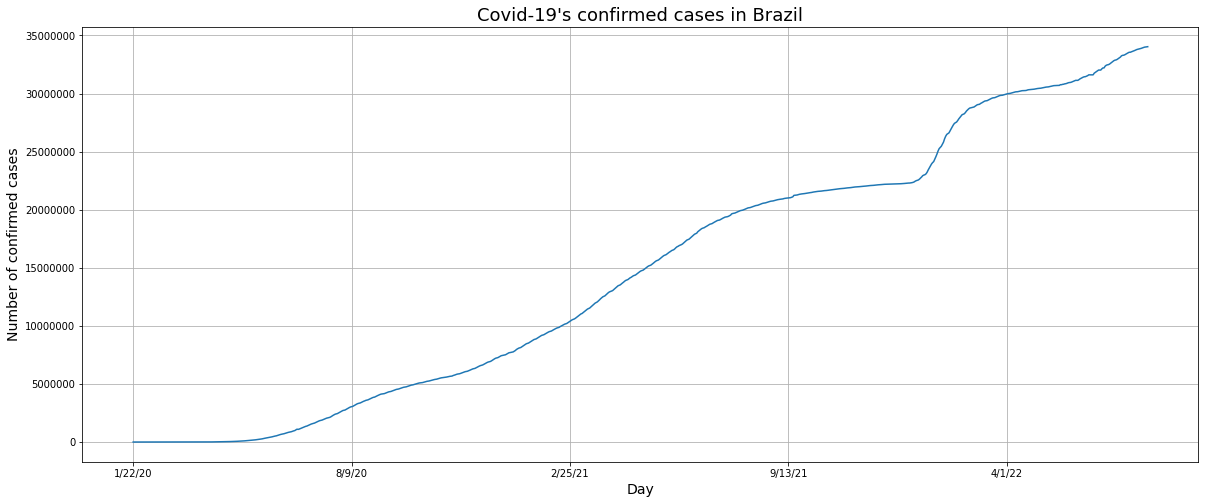

In [218]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
plt.title("Covid-19's confirmed cases in Brazil",fontsize = 18)
plt.ylabel("Number of confirmed cases",fontsize=14)
plt.xlabel("Day",fontsize=14)
confirmed_by_country.loc["Brazil"][2:].plot()
plt.grid(True)
plt.show()

In the regions of the graph with a higher slope, we have bigger rates of contamination, in the flatter regions, we have a stabilization in the disease's propagation.

## Now we calculate the number of new cases:

We can do that, by doing....

In [219]:
new_cases_brazil= confirmed_by_country.loc["Brazil"][2:].diff().dropna()
new_cases_brazil

1/23/20        0.0
1/24/20        0.0
1/25/20        0.0
1/26/20        0.0
1/27/20        0.0
            ...   
8/4/22     40433.0
8/5/22     29976.0
8/6/22     16703.0
8/7/22      7198.0
8/8/22     17409.0
Name: Brazil, Length: 929, dtype: float64

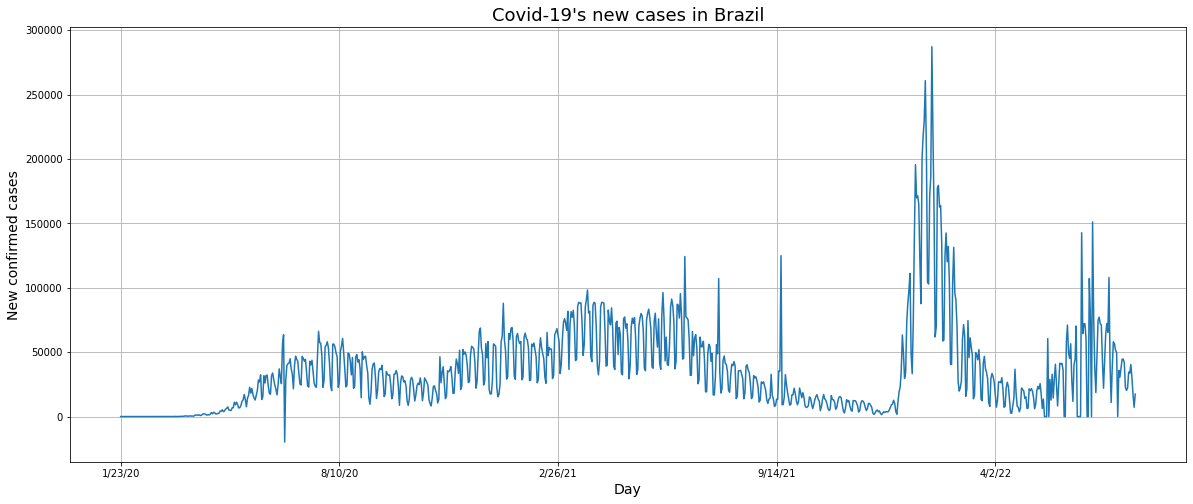

In [220]:
plt.figure(figsize=(20,8))
plt.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
plt.title("Covid-19's new cases in Brazil",fontsize = 18)
plt.ylabel("New confirmed cases",fontsize=14)
plt.xlabel("Day",fontsize=14)
new_cases_brazil.plot()
plt.grid(True)
plt.show()

We can see that in the beginning there was a negative number of confirmed cases, this could be explained by a review in the data.

We can also see that in the end there is a realy high peak in the number of new confirmed cases. This can also be explained by a review in the data, or it could be a new peak of the disease's propagation, even with a high number of vaccinated people.

**It is important to remind that we are only seeing the number of new confimed cases and not the number of deaths or the severity of the disease, so, at the end, Brazil could have  reach the peak of the disease's propagation,but due to the vaccination the number of serious cases/deaths for the disease could be smaller**



## Let's see the cases globally:

In [221]:
last_date = confirmed.columns[-1]
last_date

'8/8/22'

Let's see the top 10:

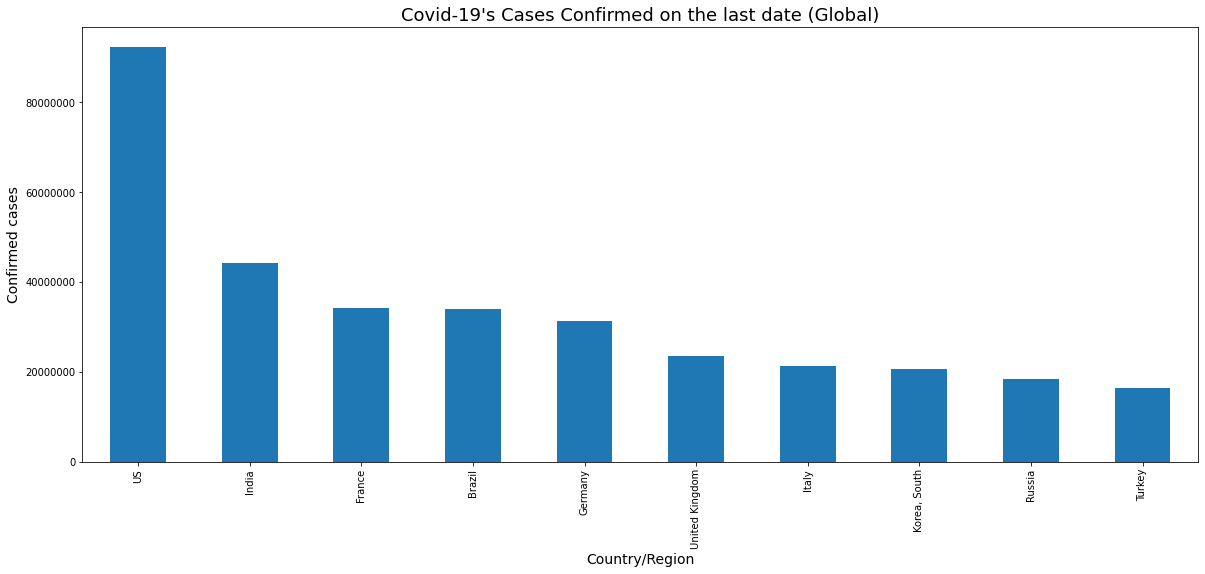

In [222]:
plt.figure(figsize=(20,8))
plt.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
plt.title("Covid-19's Cases Confirmed on the last date (Global)",fontsize = 18)
plt.ylabel("Confirmed cases",fontsize=14)
plt.xlabel("Day",fontsize=14)
confirmed_by_country[last_date].sort_values(ascending = False)[:10].plot(kind='bar')
plt.show()

## Now we'll analyse the deaths and the recovered cases:

We gonna make a function that returns the latest updates by country:

In [223]:
def latest_by_country(data):
  return data.groupby('Country/Region').sum()[last_date]

latest_by_country(confirmed).head()

Country/Region
Afghanistan    187685
Albania        317681
Algeria        268356
Andorra         45793
Angola         102636
Name: 8/8/22, dtype: int64

In [224]:
informations = [latest_by_country(confirmed),latest_by_country(deaths),latest_by_country(recovered)]

combined  = pd.concat(informations,axis=1)
combined.columns = ["confirmed","deaths","recovered"]
combined.head()

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,187685,7753,0
Albania,317681,3566,0
Algeria,268356,6878,0
Andorra,45793,154,0
Angola,102636,1917,0


Let's compare with the 3 arrays:

In [225]:
display(latest_by_country(confirmed).head())

display(latest_by_country(deaths).head())

display(latest_by_country(recovered).head())

Country/Region
Afghanistan    187685
Albania        317681
Algeria        268356
Andorra         45793
Angola         102636
Name: 8/8/22, dtype: int64

Country/Region
Afghanistan    7753
Albania        3566
Algeria        6878
Andorra         154
Angola         1917
Name: 8/8/22, dtype: int64

Country/Region
Afghanistan    0
Albania        0
Algeria        0
Andorra        0
Angola         0
Name: 8/8/22, dtype: int64

They are equal!

## Let's calculate the lethality ratio:

**It's hard to calculate precisely the lethality ratio during the epidemic**

**In the beginning it is common that only serious cases are reported**

###The calculation will be:

In [226]:
sum_up = combined.sum()

lethality_ratio=sum_up["deaths"]/sum_up["confirmed"]
print("{} %".format(round(lethality_ratio*100,2)))

1.1 %


**1.1% of the cases that are confirmed in our dataset died**

## Let's separate the Lethality ratio by country:

In [227]:
lethality_ratio = (combined["deaths"]/combined["confirmed"])*100
combined["lethality_ratio"]= lethality_ratio
combined.head()

,confirmed,deaths,recovered,lethality_ratio
Country/Region,,,,
Afghanistan,187685,7753,0,4.130858
Albania,317681,3566,0,1.122510
Algeria,268356,6878,0,2.563013
Andorra,45793,154,0,0.336296
Angola,102636,1917,0,1.867766


Let's see which countries have the highest Lethality Ratio:

In [228]:
combined.sort_values("lethality_ratio",ascending = False).head()

,confirmed,deaths,recovered,lethality_ratio
Country/Region,,,,
"Korea, North",1,6,0,600.000000
MS Zaandam,9,2,0,22.222222
Yemen,11903,2152,0,18.079476
Sudan,63128,4960,0,7.857052
Syria,56564,3153,0,5.574217


We can see that there is something wrong with North Korea data, since there is only one case confirmed and nine deaths.Let's drop North Korea from our database.

In [229]:
combined.drop("Korea, North",inplace= True)

combined.sort_values("lethality_ratio",ascending = False).head()

,confirmed,deaths,recovered,lethality_ratio
Country/Region,,,,
MS Zaandam,9,2,0,22.222222
Yemen,11903,2152,0,18.079476
Sudan,63128,4960,0,7.857052
Syria,56564,3153,0,5.574217
Peru,3970336,214694,0,5.407452


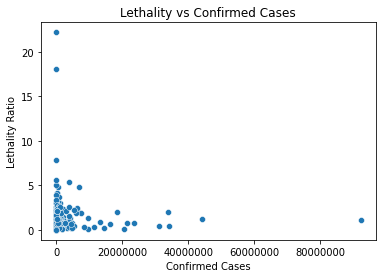

In [230]:
import seaborn as sns 

plt.ticklabel_format(style='plain', axis='x')
sns.scatterplot(data = combined , x = 'confirmed',y = 'lethality_ratio').set(
    title=("Lethality vs Confirmed Cases"),
    xlabel = "Confirmed Cases" , 
    ylabel = "Lethality Ratio")
plt.show()

We can see that countries with a small number of confirmed cases tend to have a bigger lethality ratio, that's because they haven't acquired enough data yet.

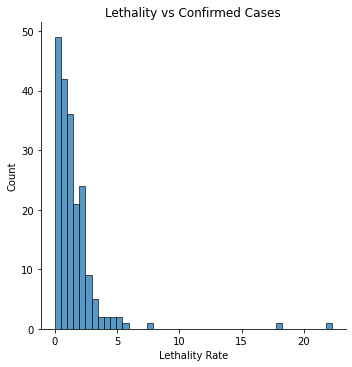

In [231]:
sns.displot(combined["lethality_ratio"],kde=False).set(
    title=("Lethality vs Confirmed Cases"),
    xlabel = "Lethality Rate")
plt.show()

Let's remake the top 5 countries with the highest Lethality Ratio considering only Countries that have more than 40 confirmed cases of the disease:

In [232]:
combined.query("confirmed > 40").sort_values("lethality_ratio",ascending = False).head()

,confirmed,deaths,recovered,lethality_ratio
Country/Region,,,,
Yemen,11903,2152,0,18.079476
Sudan,63128,4960,0,7.857052
Syria,56564,3153,0,5.574217
Peru,3970336,214694,0,5.407452
Somalia,27020,1361,0,5.037010


Now, we want to calculate this Lethality Ration using another formula, such as: 

          Lethality Ratio = Number of deaths/ (Number of deaths + Number of recovered cases)


This is a more accurate way to calculate this ratio, since there are people still recoverying from COVID-19, and we don't know if they will die or recover.

That is, the number of confirmed cases that we used above is actually equal to:

       Number of confirmed cases = Number of deaths + Number of recovered cases + Number of people still on recovery


But, to do this, firstly we'll have to deal with the problem on our Recovered Cases's Database

In [233]:
combined.head(5)

,confirmed,deaths,recovered,lethality_ratio
Country/Region,,,,
Afghanistan,187685,7753,0,4.130858
Albania,317681,3566,0,1.122510
Algeria,268356,6878,0,2.563013
Andorra,45793,154,0,0.336296
Angola,102636,1917,0,1.867766


They're all equal to 0

Let's see the last date that have the data of the recovered:

In [234]:
recovered_by_country = recovered.groupby("Country/Region").sum()
recovered_by_country

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/30/22,7/31/22,8/1/22,8/2/22,8/3/22,8/4/22,8/5/22,8/6/22,8/7/22,8/8/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
last_date_recovered = recovered_by_country.columns[2]
for i in range(2,recovered_by_country.shape[1]):
  date = recovered_by_country.columns[i]
  verify = recovered_by_country[recovered_by_country[date]!=0]
  if len(verify) >= 0.92*len(recovered_by_country):
    save_verify = verify
    last_date_recovered = date
last_date_recovered


'8/4/21'

Let's see how many countries have reported at this date:

In [236]:
print('{} countries have reported untill, that correponds to {} % of our database'.format(len(save_verify),round((len(save_verify)/len(recovered_by_country)*100),2)))

188 countries have reported untill, that correponds to 94.47 % of our database


Let's see the countries that haven't reported on this date:

In [237]:
all_countries =  recovered_by_country.index
all_countries

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Winter Olympics 2022', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country/Region', length=199)

In [238]:
countries_on_last_date_recovered = save_verify.index
countries_on_last_date_recovered

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=188)

In [239]:
countries_not_on_last_date_recovered = list()
for country in all_countries:
  if country not in countries_on_last_date_recovered:
    countries_not_on_last_date_recovered.append(country)
countries_not_on_last_date_recovered

['Antarctica',
 'Belgium',
 'Kiribati',
 'Korea, North',
 'Palau',
 'Serbia',
 'Summer Olympics 2020',
 'Sweden',
 'Tonga',
 'US',
 'Winter Olympics 2022']

Those are the countries that have not reported on 8/4/21.

We can see that US, that had a significant number of confirmed cases will be excluded from our study. Let's see the last date that US reported:


In [240]:
last_date_recovered = recovered_by_country.columns[2]
for i in range(2,recovered_by_country.shape[1]):
  date = recovered_by_country.columns[i]
  verify = recovered_by_country[recovered_by_country[date]!=0]
  if len(verify) >= 0.92*len(recovered_by_country) and 'US' in verify.index:
    save_verify = verify
    last_date_recovered = date
last_date_recovered

'12/13/20'


Let's also see which countries did not report that day:

In [241]:
countries_on_last_date_recovered = save_verify.index
countries_on_last_date_recovered

countries_not_on_last_date_recovered = list()
for country in all_countries:
  if country not in countries_on_last_date_recovered:
    countries_not_on_last_date_recovered.append(country)
countries_not_on_last_date_recovered

['Antarctica',
 'Belgium',
 'Kiribati',
 'Korea, North',
 'Micronesia',
 'Palau',
 'Serbia',
 'Summer Olympics 2020',
 'Sweden',
 'Tonga',
 'Winter Olympics 2022']

We can see that US have came out of the list and Micronesia has came in  the list.

So let's remake our Database taking these countries and considering the calculus untill this date.

Let's start by remaking the combined list

In [253]:
informations = [latest_by_country_at(confirmed,last_date_recovered),
                latest_by_country_at(deaths,last_date_recovered),
                latest_by_country_at(recovered,last_date_recovered)]

combined2  = pd.concat(informations,axis=1)
combined2.columns = ["confirmed","deaths","recovered"]
combined2.drop(countries_not_on_last_date_recovered,inplace= True)
combined2.head()

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,48952,1960,38250
Albania,48530,1003,24820
Algeria,92102,2596,60457
Andorra,7338,79,6629
Angola,16188,371,8898


Now that we have our recovered's data let's remake the calculations

Firstly, we'll recalculate the lethality ration in the original formula:

In [254]:
sum_up = combined2.sum()

lethality_ratio=sum_up["deaths"]/sum_up["confirmed"]
print(" Global Lethality ratio: {} %".format(round(lethality_ratio*100,2)))

 Global Lethality ratio: 2.31 %


And we'll also separate by country:

In [255]:
lethality_ratio_1 = (combined2["deaths"]/combined2["confirmed"])*100
combined2["lethality_ratio_1(%)"]= lethality_ratio_1
combined2.head()

,confirmed,deaths,recovered,lethality_ratio_1(%)
Country/Region,,,,
Afghanistan,48952,1960,38250,4.003922
Albania,48530,1003,24820,2.066763
Algeria,92102,2596,60457,2.818614
Andorra,7338,79,6629,1.076588
Angola,16188,371,8898,2.291821


Let's sort this list:

In [256]:
combined2.sort_values("lethality_ratio_1(%)",ascending = False).head(10)

,confirmed,deaths,recovered,lethality_ratio_1(%)
Country/Region,,,,
Yemen,2083,606,1383,29.092655
MS Zaandam,9,2,7,22.222222
Peru,980943,90797,916335,9.256093
Mexico,1250044,113953,918681,9.115919
Ecuador,202110,13875,177951,6.865073
Sudan,21591,1347,12313,6.238711
Bolivia,147150,9018,126221,6.128440
Chad,1770,102,1607,5.762712
Egypt,121575,6920,104875,5.691960


Now let's calculate using the second formula:

In [257]:
lethality_ratio_2=sum_up["deaths"]/(sum_up["deaths"] + sum_up["recovered"])
print(" Global Lethality ratio (second formula): {} %".format(round(lethality_ratio_2*100,2)))

 Global Lethality ratio (second formula): 3.36 %


In [278]:
lethality_ratio_2 = ((100*combined2["deaths"])/(combined2["deaths"] + combined2["recovered"]))
combined2["lethality_ratio_2(%)"]= lethality_ratio_2
combined2["deaths and recovered"] =  combined2["deaths"] + combined2["recovered"] # We'll use this on a graph 
combined2.sort_values("lethality_ratio_2(%)",ascending = False).head(10)

,confirmed,deaths,recovered,lethality_ratio_1(%),lethality_ratio_2(%),deaths and recovered
Country/Region,,,,,,
United Kingdom,1854353,64267,4016,3.465737,94.118595,68283
Netherlands,632024,10134,7872,1.603420,56.281240,18006
Yemen,2083,606,1383,29.092655,30.467572,1989
France,2432601,58014,182685,2.384855,24.102302,240699
Spain,1730575,47624,150376,2.751918,24.052525,198000
MS Zaandam,9,2,7,22.222222,22.222222,9
Mexico,1250044,113953,918681,9.115919,11.035178,1032634
Syria,9166,518,4376,5.651320,10.584389,4894
Tanzania,509,21,183,4.125737,10.294118,204


We can see that UK and Netherlands are now at the top of the list, with very high Lethality's ratios.

This could be explained by the little recovered's data that they have. 


They were probably going through a wave of contamination, where most cases had contracted the disease, but were still being treated.


Let's finish by redoing the two graphs:

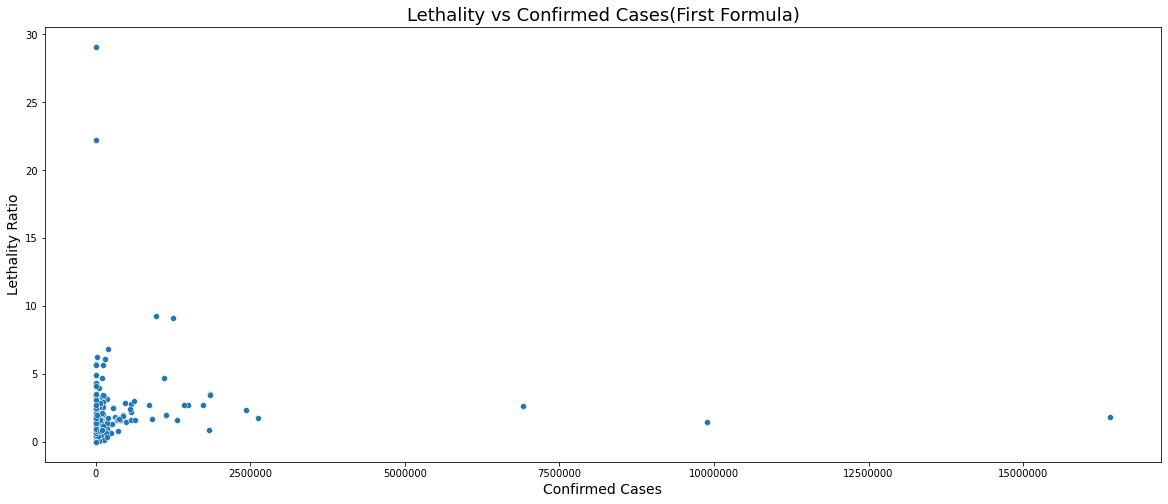

In [264]:
plt.figure(figsize=(20,8))
plt.ticklabel_format(style='plain', axis='x')
sns.scatterplot(data = combined2 , x = 'confirmed',y = 'lethality_ratio_1(%)')
plt.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
plt.title("Lethality vs Confirmed Cases(First Formula)",fontsize = 18)
plt.ylabel("Lethality Ratio",fontsize=14)
plt.xlabel("Confirmed Cases",fontsize=14)
plt.show()

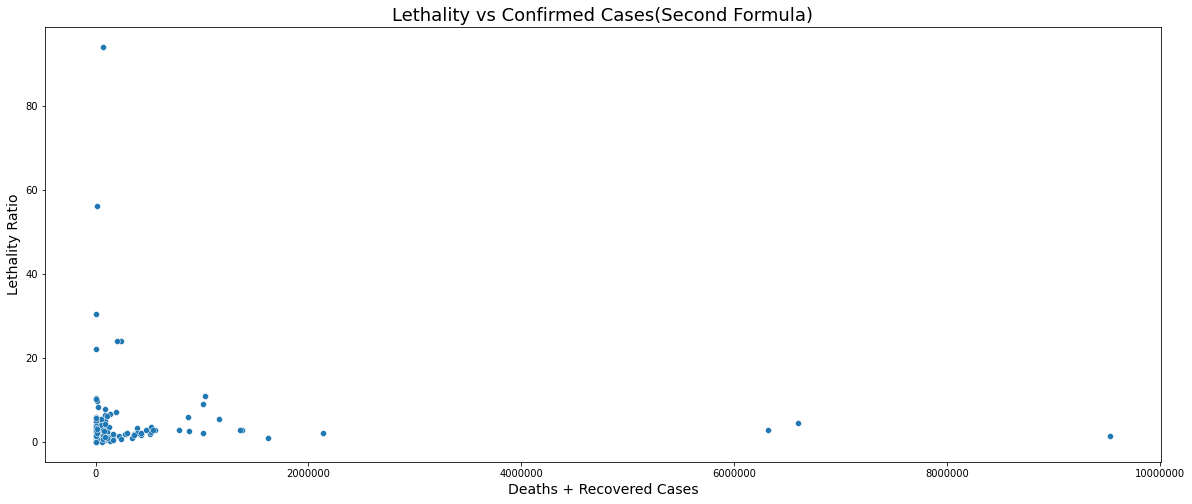

In [276]:
plt.figure(figsize=(20,8))
plt.ticklabel_format(style='plain', axis='x')
sns.scatterplot(data = combined2 , x = 'deaths and recovered',y = 'lethality_ratio_2(%)')
plt.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
plt.title("Lethality vs Confirmed Cases(Second Formula)",fontsize = 18)
plt.ylabel("Lethality Ratio",fontsize=14)
plt.xlabel("Deaths + Recovered Cases",fontsize=14)
plt.show()

Those graphs show us that higher the number of confirmed cases, lower is the lethality ratio 

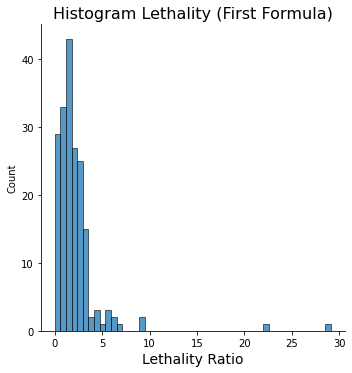

In [270]:
sns.displot(combined2["lethality_ratio_1(%)"],kde=False)
plt.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
plt.title("Histogram Lethality (First Formula)",fontsize = 16)
plt.xlabel("Lethality Ratio",fontsize=14)
plt.show()

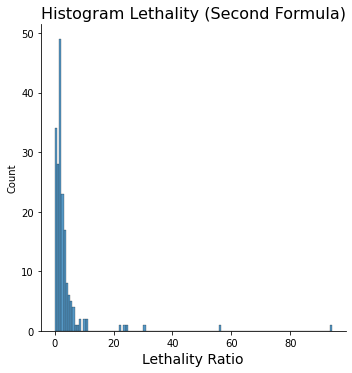

In [277]:
sns.displot(combined2["lethality_ratio_2(%)"],kde=False)
plt.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
plt.title("Histogram Lethality (Second Formula)",fontsize = 16)
plt.xlabel("Lethality Ratio",fontsize=14)
plt.show()

We can see that most of the countries have a Lethality Ratio close to the Global Value (3.36%)